In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
!ls 

ex1data1.csv                    linreg_height_weight.ipynb
linear_regression-task1-2.ipynb weights_heights.csv


In [3]:
data = pd.read_csv('ex1data1.csv')

In [4]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


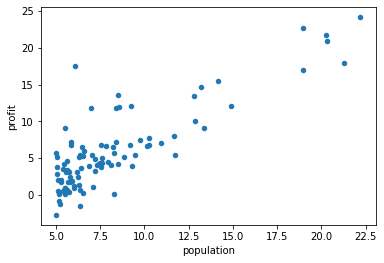

In [5]:
data.plot(x='population', y='profit', kind='scatter')

In [6]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [7]:
X = np.array(data['population'])
Y = np.array(data['profit'])

In [8]:
# scale
means, stds = np.mean(X, axis=0), np.std(X, axis=0)
X = (X - means)/stds

In [9]:
n = np.shape(X)[0]
X = np.reshape(X, (n, 1))

In [10]:
ones = np.reshape(np.ones(n), (n, 1))

X = np.hstack((X, ones))

In [46]:
def mse(y, y_pred):
    return np.mean((y-y_pred)**2)

In [13]:
def linear_prediction(X, w):
    return np.dot(X, w)

In [140]:
def gradient_descent(X, y,  theta, learning_rate=-1e3, iterations=100):
    m = len(y)
    
    errors = []
    period = int(iterations / 10) 
    for i in range(iterations):
        y_pred = linear_prediction(X, theta)
        theta  = theta -(1/m) * learning_rate * (X.T.dot(y_pred - Y))
        error = mse(y, y_pred)
        
        if(i % period == 0 ):
            print('Iteration {} error: {}'.format( i, float(error) ))

        errors.append(error) 
    print('Final error %f' % error)
#     print('Finat theta: ', theta)
    plt.plot(errors, label='RMSE')
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    return theta, errors
    

Iteration 0 error: 58.75859959879144
Iteration 1000 error: 7.944158282218157
Iteration 2000 error: 1.0740496071018206
Iteration 3000 error: 0.14521142675338117
Iteration 4000 error: 0.019632574063921545
Iteration 5000 error: 0.0026543225488031585
Iteration 6000 error: 0.0003588642105790723
Iteration 7000 error: 4.851841449813756e-05
Iteration 8000 error: 6.559686020551931e-06
Iteration 9000 error: 8.868690606059314e-07
Final error 0.000000


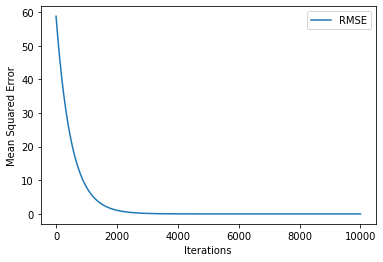

In [143]:
theta = np.random.randn(2, 1)
its = 10000
theta, errors = gradient_descent(X, Y, theta, iterations=its, learning_rate=1e-3)


In [147]:
errors[-1] 


1.2014480028898243e-07

In [73]:
10000 % 101

1